In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

class HodgkinHuxleyNeuron:
    def __init__(self):
    # Hodgkin-Huxley model parameters
        self.gNa = 120.0  # Sodium conductance
        self.gK = 36.0    # Potassium conductance
        self.gL = 0.3     # Leak conductance

        self.Cm = 1.0  # Membrane capacitance
        self.VK = -12.0  # K equilibrium potential
        self.VNa = 115.0  # Na equilibrium potential
        self.Vl = 10.613  # Leak equilibrium potential

        # Time parameters
        self.tmin = 0.0
        self.tmax = 50.0
        self.T = np.linspace(self.tmin, self.tmax, 10000)

    # Potassium ion-channel rate functions
    def alpha_n(self, Vm):
        return (0.01 * (Vm + 10)) / (np.exp((Vm + 10.0) / 10.0) - 1.0)

    def beta_n(self, Vm):
        return 0.125 * np.exp(Vm / 80.0)

    # Sodium ion-channel rate functions
    def alpha_m(self, Vm):
        return (0.1 * (Vm + 25.0)) / (np.exp((Vm + 10.0) / 10.0) - 1.0)

    def beta_m(self, Vm):
        return 4.0 * np.exp(Vm / 18.0)

    def alpha_h(self, Vm):
        return 0.07 * np.exp(-Vm / 20.0)

    def beta_h(self, Vm):
        return 1.0 / (np.exp((Vm + 30) / 10) + 1.0)

    # Resting state Vm = 0
    def n_inf(self, Vm=0):
        return self.alpha_n(Vm) / (self.alpha_n(Vm) + self.beta_n(Vm))

    def m_inf(self, Vm=0):
        return self.alpha_m(Vm) / (self.alpha_m(Vm) + self.beta_m(Vm))

    def h_inf(self, Vm=0):
        return self.alpha_h(Vm) / (self.alpha_h(Vm) + self.beta_h(Vm))

    # Input stimulus
    def Id(self, t):
        if 0.0 < t < 1.0:
            return 150.0
        elif 10.0 < t < 11.0:
            return 50.0
        return 0.0

    def compute_derivative(self, y, t0):
        dy = np.zeros((4,))

        Vm = y[0]  # Membrane potential
        n = y[1]
        m = y[2]
        h = y[3]

    # dVm/dt
        GK = (self.gK / self.Cm) * np.power(n, 4.0)
        GNa = (self.gNa / self.Cm) * np.power(m, 3.0) * h
        GL = self.gL / self.Cm

        dy[0] = (self.Id(t0) / self.Cm) - (GK * (Vm - self.VK)) - (GNa * (Vm - self.VNa)) - (GL * (Vm - self.Vl))

    # dn/dt
        dy[1] = (self.alpha_n(Vm) * (1.0 - n)) - (self.beta_n(Vm) * n)

# dm/dt
        dy[2] = (self.alpha_m(Vm) * (1.0 - m)) - (self.beta_m(Vm) * m)

# dh/dt
        dy[3] = (self.alpha_h(Vm) * (1.0 - h)) - (self.beta_h(Vm) * h)

        return dy

    def solve_ode(self):
# Initial state (Vm, n, m, h)
        Y = np.array([0.0, self.n_inf(), self.m_inf(), self.h_inf()])

# Solve ODE system
        Vy = odeint(self.compute_derivative, Y, self.T)

        return Vy

    def plot_results(self, Vy):
# Input stimulus
        Idv = [self.Id(t) for t in self.T]

        fig, ax = plt.subplots(figsize=(12, 7))
        ax.plot(self.T, Idv)
        ax.set_xlabel('Time (ms)')
        ax.set_ylabel(r'Current density (uA/$cm^2$)')
        ax.set_title('Stimulus (Current density)')
        plt.grid()

# Neuron potential
        fig, ax = plt.subplots(figsize=(12, 7))
        ax.plot(self.T, Vy[:, 0])
        ax.set_xlabel('Time (ms)')
        ax.set_ylabel('Vm (mV)')
        ax.set_title('Neuron potential with two spikes')
        plt.grid()

# Trajectories with limit cycles
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.plot(Vy[:, 0], Vy[:, 1], label='Vm - n')
        ax.plot(Vy[:, 0], Vy[:, 2], label='Vm - m')
        ax.set_title('Limit cycles')
        ax.legend()
        plt.grid()



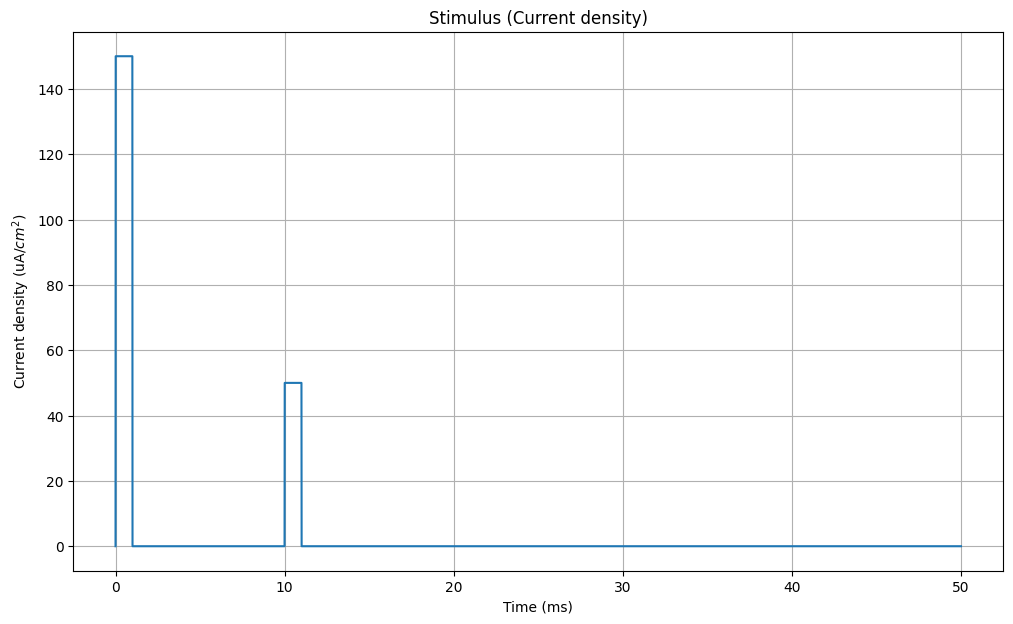

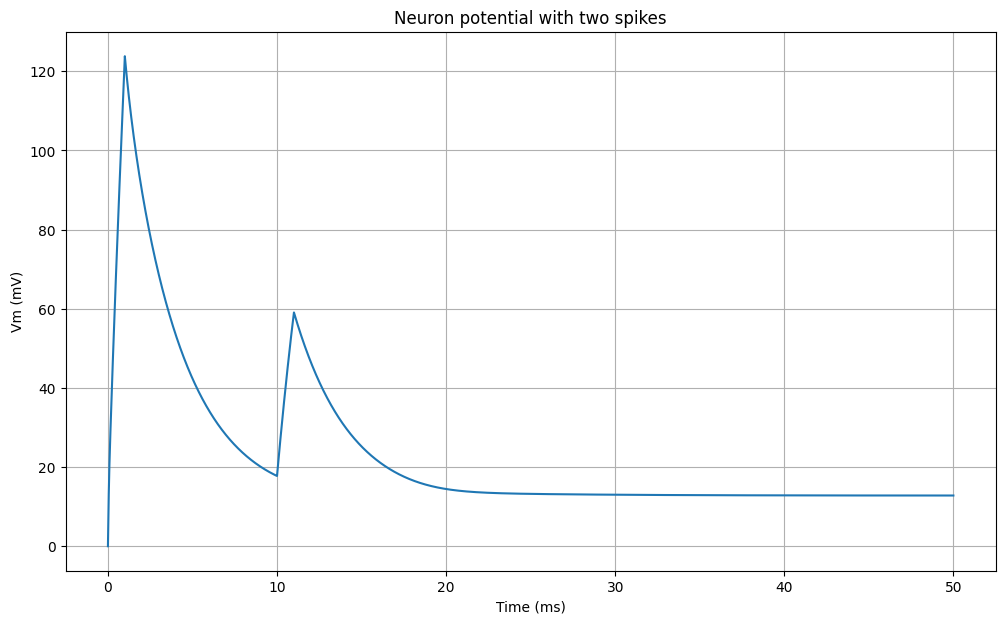

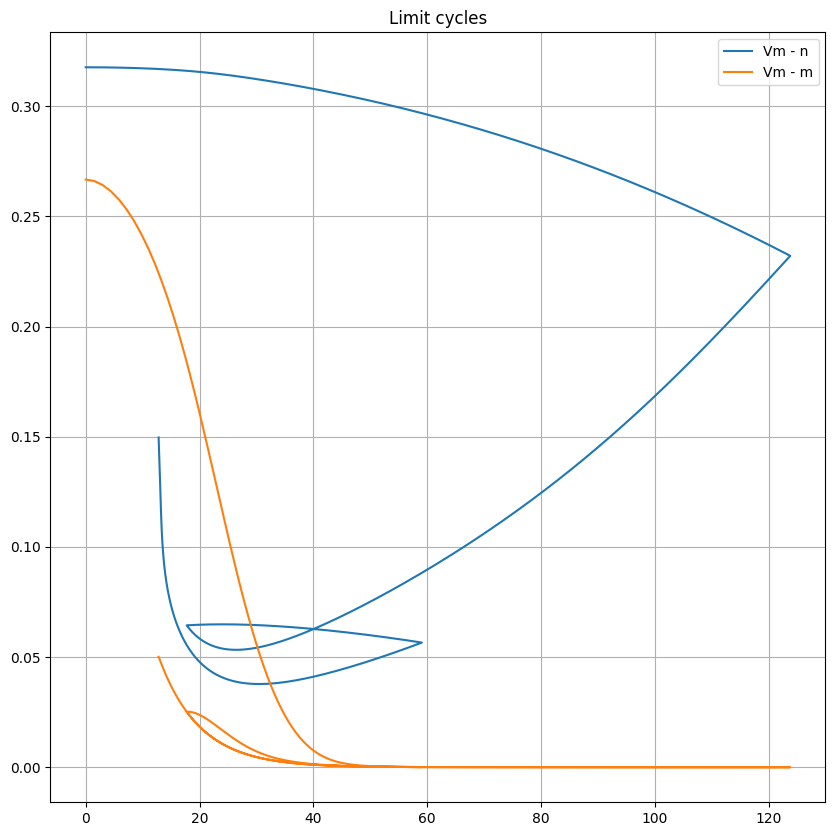

In [2]:
# Usage
neuron = HodgkinHuxleyNeuron()
Vy = neuron.solve_ode()
neuron.plot_results(Vy)


In [4]:
class NeuralNetwork:
    def __init__(self, num_neurons):
        self.neurons = [HodgkinHuxleyNeuron() for _ in range(num_neurons)]

    def simulate_neuron(self):
        results = []
        for neuron in self.neurons:
            Vy = neuron.solve_ode()
            results.append(Vy)
            neuron.plot_results(Vy)
    def plot_activity(self):
        for i, neuron in enumerate(self.neurons):
            Vy= neuron.solve_ode()
            neuron.plot_results(Vy)

        

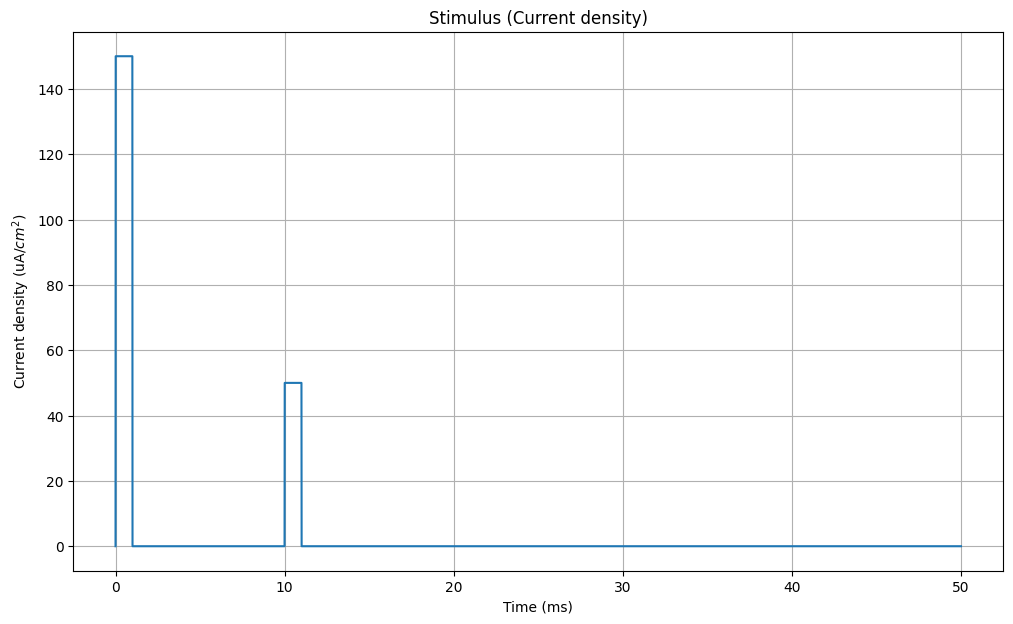

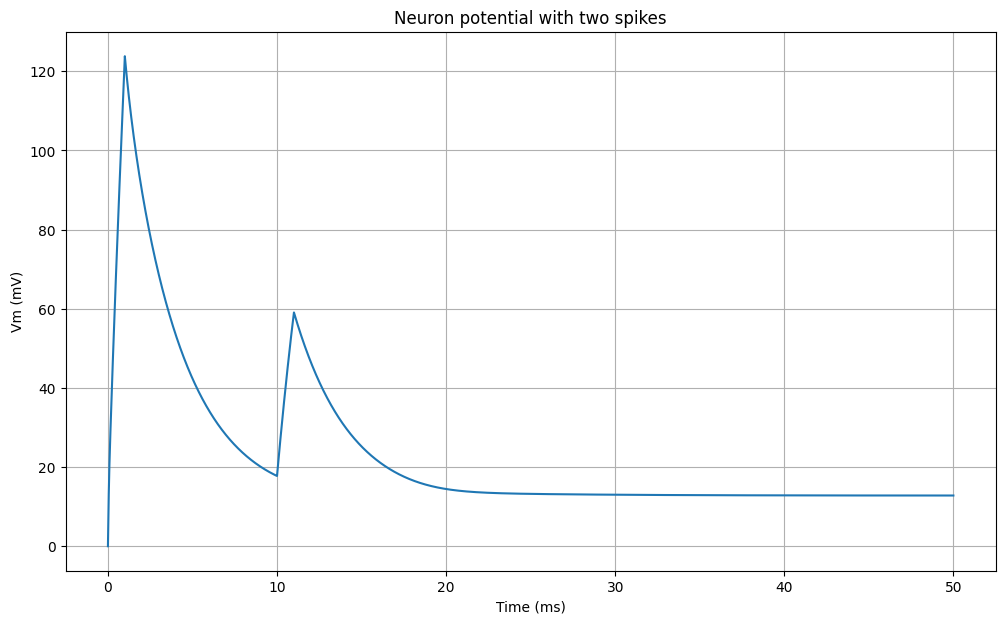

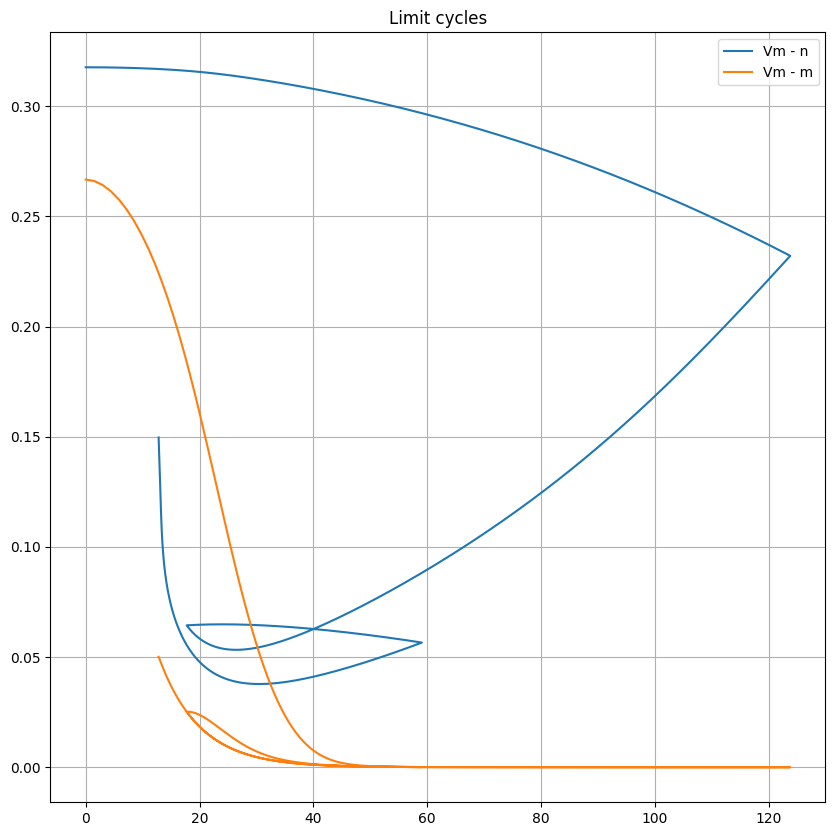

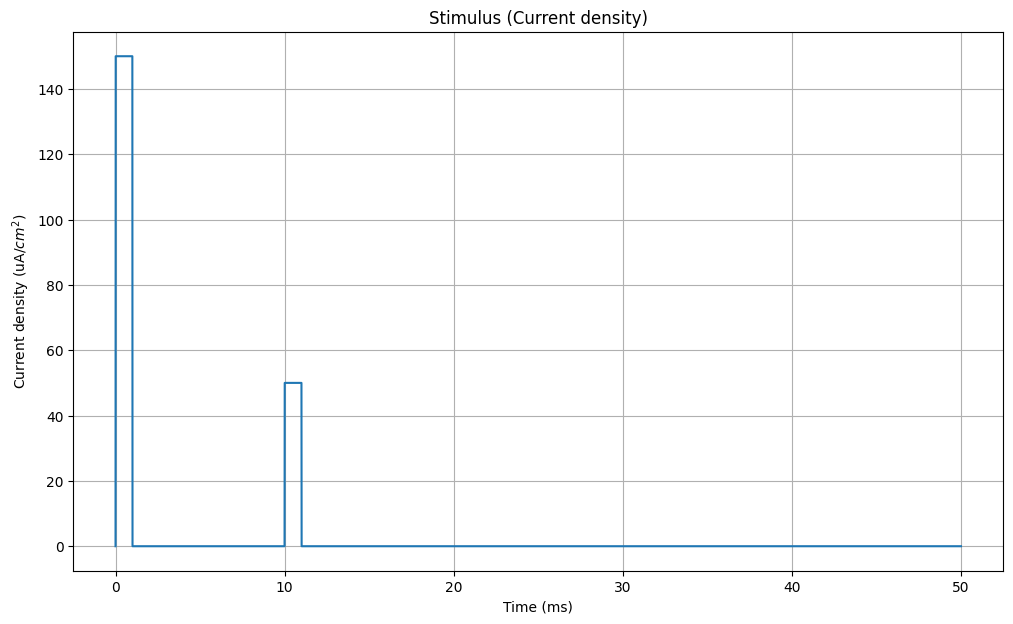

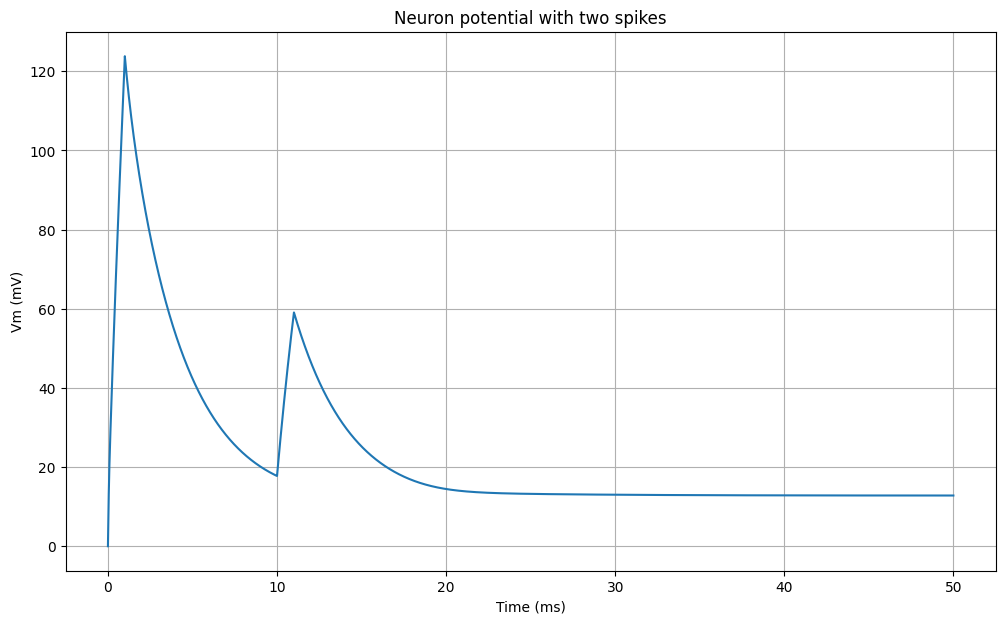

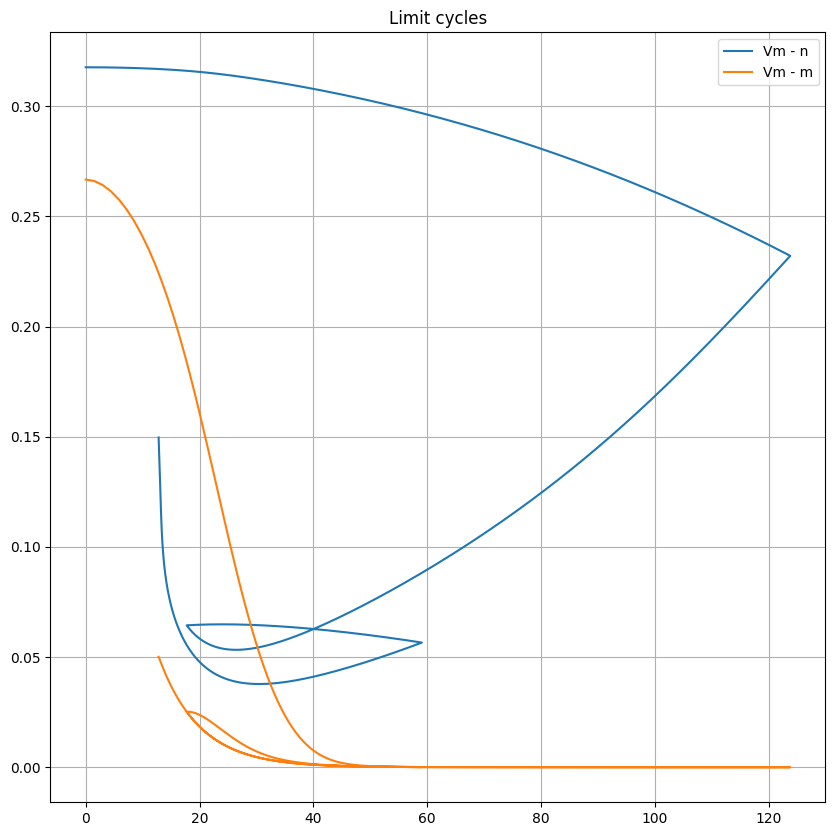

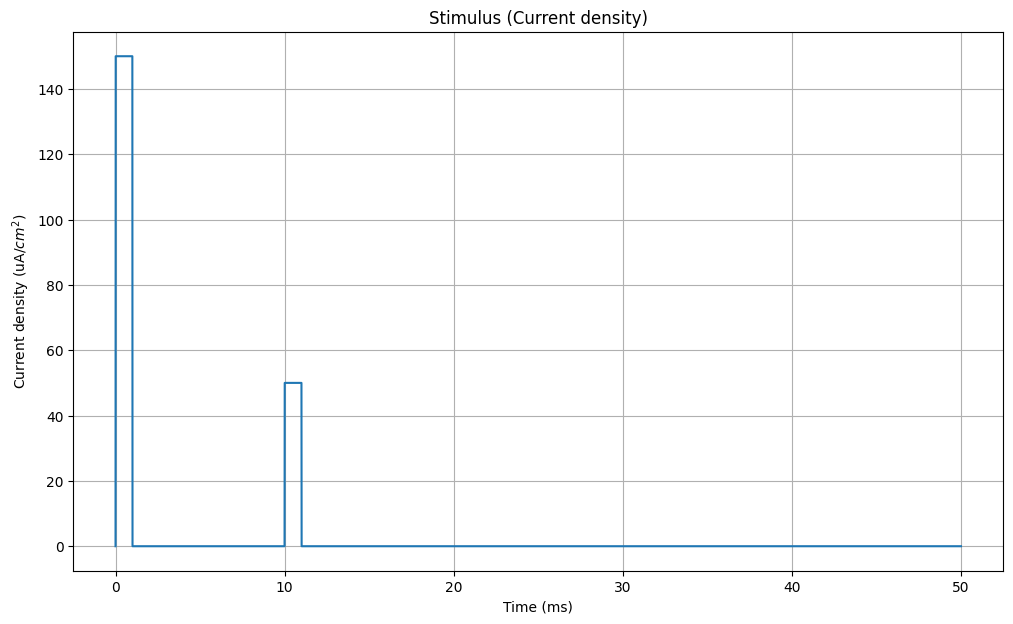

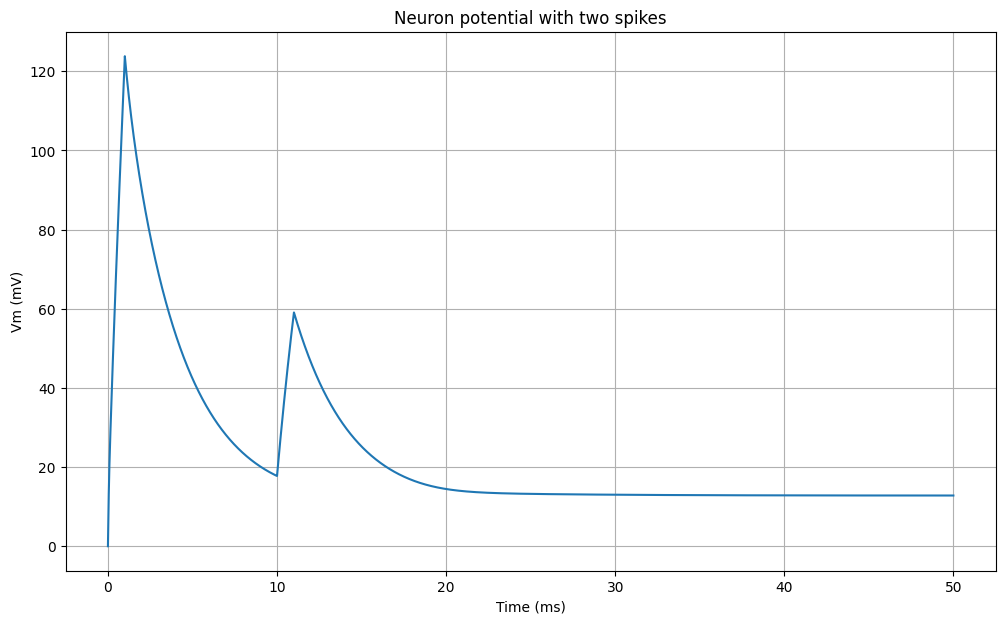

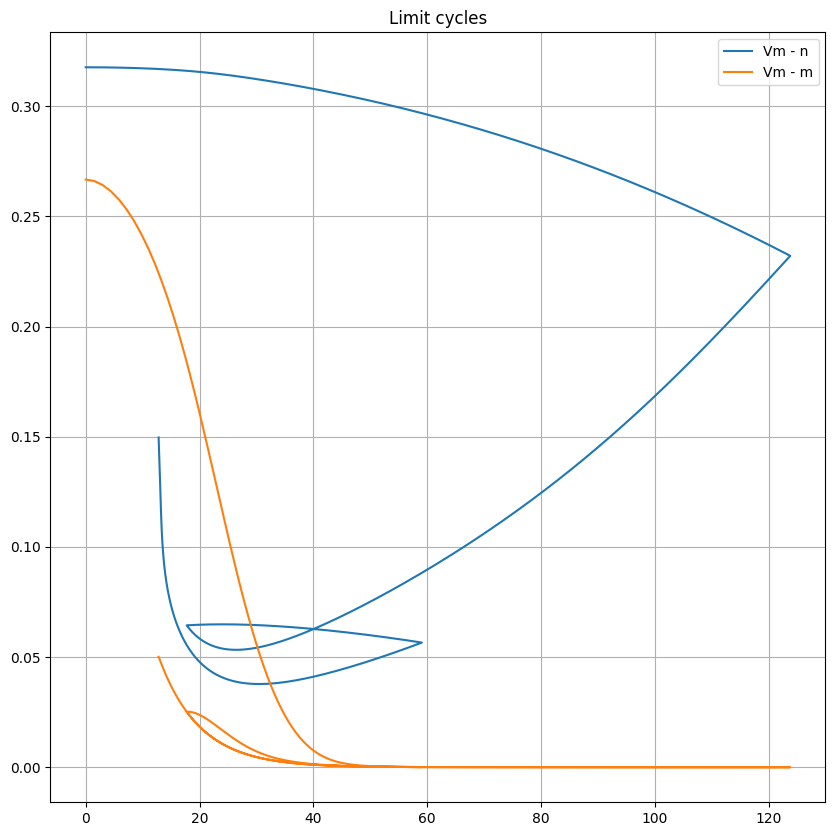

In [7]:
nn = NeuralNetwork(num_neurons=3)
nn.simulate_neuron()